<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#import" data-toc-modified-id="import-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>import</a></span></li></ul></li><li><span><a href="#读取数据集" data-toc-modified-id="读取数据集-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>读取数据集</a></span></li><li><span><a href="#标准化处理" data-toc-modified-id="标准化处理-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>标准化处理</a></span></li><li><span><a href="#模型" data-toc-modified-id="模型-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>模型</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#svm" data-toc-modified-id="svm-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>svm</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></li><li><span><a href="#评分--混淆矩阵-&amp;-precision_score-&amp;-recall_score" data-toc-modified-id="评分--混淆矩阵-&amp;-precision_score-&amp;-recall_score-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>评分- 混淆矩阵 &amp; precision_score &amp; recall_score</a></span></li><li><span><a href="#评分表格" data-toc-modified-id="评分表格-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>评分表格</a></span><ul class="toc-item"><li><span><a href="#计算评分" data-toc-modified-id="计算评分-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>计算评分</a></span><ul class="toc-item"><li><span><a href="#xgb" data-toc-modified-id="xgb-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>xgb</a></span></li><li><span><a href="#其他" data-toc-modified-id="其他-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>其他</a></span></li></ul></li><li><span><a href="#ROC曲线" data-toc-modified-id="ROC曲线-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>ROC曲线</a></span><ul class="toc-item"><li><span><a href="#LR" data-toc-modified-id="LR-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>LR</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#DecisionTree" data-toc-modified-id="DecisionTree-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>DecisionTree</a></span></li><li><span><a href="#RondomForest" data-toc-modified-id="RondomForest-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>RondomForest</a></span></li><li><span><a href="#XGboost" data-toc-modified-id="XGboost-5.2.5"><span class="toc-item-num">5.2.5&nbsp;&nbsp;</span>XGboost</a></span></li></ul></li></ul></li><li><span><a href="#结果汇总" data-toc-modified-id="结果汇总-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>结果汇总</a></span><ul class="toc-item"><li><span><a href="#Q" data-toc-modified-id="Q-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Q</a></span></li></ul></li><li><span><a href="#参考资料" data-toc-modified-id="参考资料-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>参考资料</a></span><ul class="toc-item"><li><span><a href="#plot-roc" data-toc-modified-id="plot-roc-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>plot-roc</a></span></li><li><span><a href="#xgboost" data-toc-modified-id="xgboost-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>xgboost</a></span></li><li><span><a href="#precision_recall_curve" data-toc-modified-id="precision_recall_curve-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>precision_recall_curve</a></span></li></ul></li></ul></div>

任务4 - 模型评估（2天）

记录5个模型（逻辑回归、SVM、决策树、随机森林、XGBoost）关于accuracy、precision，recall和F1-score、auc值的评分表格，并画出ROC曲线。

时间：2天

- 逻辑回归
- svm
- 决策树
- 随机森林
- XGBoost

## import

In [1]:
import json, io, re, os, time
from datetime import datetime, timedelta
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn

from collections import defaultdict, Counter
%matplotlib inline

In [3]:
# 设置显示行数
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# 读取数据集

经过前续处理缺失值后和特征选择后

In [4]:
cols_left = ['trans_activity_month', 'trans_activity_day', 'rank_trad_1_month', 
             'top_trans_count_last_1_month', 'avg_price_top_last_12_valid_month', 
             'first_transaction_time_diff_day', 'latest_query_time_diff_day', 
             'loans_latest_time_diff_day', 'take_amount_in_later_12_month_highest', 
             'trans_amount_increase_rate_lately', 'transd_mcc', 'trans_days_interval_filter',
             'trans_days_interval', 'repayment_capability', 'number_of_trans_from_2011', 
             'historical_trans_amount', 'historical_trans_day', 'trans_amount_3_month', 
             'abs', 'avg_price_last_12_month', 'trans_top_time_last_1_month', 'trans_top_time_last_6_month', 
             'consume_top_time_last_1_month', 'consume_top_time_last_6_month', 
             'trans_fail_top_count_enum_last_1_month', 'trans_fail_top_count_enum_last_6_month',
             'trans_fail_top_count_enum_last_12_month', 'consume_mini_time_last_1_month', 
             'max_cumulative_consume_later_1_month', 'pawns_auctions_trusts_consume_last_1_month', 
             'pawns_auctions_trusts_consume_last_6_month', 'first_transaction_day', 'trans_day_last_12_month',
             'apply_score', 'apply_credibility', 'query_sum_count', 'loans_score', 'loans_count', 
             'loans_settle_count', 'loans_overdue_count', 'latest_six_month_loan', 'history_suc_fee', 
             'history_fail_fee', 'latest_one_month_suc', 'latest_one_month_fail', 'loans_long_time', 
             'loans_credit_limit', 'loans_max_limit', 'loans_avg_limit', 'consfin_credit_limit', 
             'consfin_max_limit',
             'consfin_avg_limit', 'latest_query_day', 'loans_latest_day',
            'status']

In [5]:
train_set = pd.read_csv('train_set.csv', usecols = cols_left )
test_set = pd.read_csv('test_set.csv', usecols = cols_left)

In [6]:
train_set.head()

,trans_activity_month,trans_activity_day,rank_trad_1_month,top_trans_count_last_1_month,avg_price_top_last_12_valid_month,first_transaction_time_diff_day,latest_query_time_diff_day,loans_latest_time_diff_day,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,transd_mcc,trans_days_interval_filter,trans_days_interval,repayment_capability,number_of_trans_from_2011,historical_trans_amount,historical_trans_day,trans_amount_3_month,abs,avg_price_last_12_month,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_sum_count,loans_score,loans_count,loans_settle_count,loans_overdue_count,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,status
0,0.83,0.136,1.00,1.00,0.45,445,37,189,300,0.99,13.0,127.0,95.0,10480,10.0,33830,41.0,4260,830,1300,0.0,27.0,0.0,15.0,3.0,4.0,4.0,0.0,0,0,6160,434.0,93.0,530.0,78.0,12.0,493.0,16.0,16.0,2.0,3.0,16.0,10.0,0.0,0.0,302.0,2400.0,2800.0,2400.0,0.0,0.0,0.0,12.0,164.0,0
1,1.00,0.438,0.30,0.10,0.55,249,27,27,1500,0.72,14.0,6.0,6.0,15790,6.0,100060,79.0,28580,10550,1040,6.0,6.0,9.0,9.0,2.0,3.0,3.0,267070.0,2800,0,4350,238.0,82.0,545.0,79.0,22.0,515.0,59.0,53.0,2.0,27.0,62.0,19.0,4.0,0.0,351.0,2100.0,4000.0,1992.0,7700.0,18000.0,7600.0,2.0,2.0,0
2,0.83,0.486,0.25,0.05,0.50,2642,31,92,500,0.98,22.0,23.0,15.0,14050,70.0,302720,359.0,63600,650,1140,10.0,15.0,10.0,15.0,2.0,10.0,10.0,852.0,2390,1160,52310,2631.0,82.0,524.0,80.0,24.0,483.0,58.0,48.0,9.0,14.0,64.0,42.0,1.0,0.0,354.0,2100.0,3700.0,1725.0,10000.0,12000.0,8614.0,6.0,67.0,0
3,0.68,0.555,0.20,0.05,0.50,1240,50,135,0,0.82,18.0,7.0,7.0,11880,26.0,367680,267.0,64150,6260,1090,7.0,7.0,7.0,7.0,2.0,2.0,5.0,501194.0,2030,1230,43930,1229.0,82.0,540.0,78.0,7.0,503.0,25.0,25.0,1.0,6.0,47.0,3.0,0.0,0.0,348.0,1600.0,2300.0,1362.0,8400.0,13200.0,8800.0,25.0,110.0,0
4,0.88,0.136,1.00,1.00,0.60,882,48,116,500,4.24,15.0,81.0,36.0,11010,21.0,30610,71.0,3000,550,570,0.0,22.0,0.0,22.0,8.0,8.0,8.0,0.0,0,0,8270,871.0,141.0,533.0,79.0,8.0,462.0,11.0,5.0,5.0,6.0,5.0,130.0,0.0,12.0,318.0,1200.0,1200.0,1200.0,2100.0,2400.0,1466.0,23.0,91.0,1


In [7]:
train_set.shape

(3326, 55)

In [8]:
test_set.shape

(1426, 55)

In [9]:
# 逻辑回归
# svm
# 决策树
# 随机森林
# XGBoost

In [10]:
cols_0_to_1 =  ['low_volume_percent',
 'middle_volume_percent',
 'trans_activity_month',
 'trans_activity_day',
 'rank_trad_1_month',
 'top_trans_count_last_1_month',
 'avg_price_top_last_12_valid_month']

In [11]:
cols_catg = ['regional_mobility',
 'student_feature',
 'is_high_user',
 'reg_preference_for_trad']

In [12]:
train_set.columns

Index(['trans_activity_month', 'trans_activity_day', 'rank_trad_1_month',
       'top_trans_count_last_1_month', 'avg_price_top_last_12_valid_month',
       'first_transaction_time_diff_day', 'latest_query_time_diff_day',
       'loans_latest_time_diff_day', 'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'transd_mcc',
       'trans_days_interval_filter', 'trans_days_interval',
       'repayment_capability', 'number_of_trans_from_2011',
       'historical_trans_amount', 'historical_trans_day',
       'trans_amount_3_month', 'abs', 'avg_price_last_12_month',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'trans_fail_top_count_enum_last_1_month',
       'trans_fail_top_count_enum_last_6_month',
       'trans_fail_top_count_enum_last_12_month',
       'consume_mini_time_last_1_month',
       'max_cumulative_consume_later_1_month',
       'pawns_auction

# 标准化处理

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
x_train, y_train = train_set.iloc[:, :-1], train_set['status']
x_test, y_test = test_set.iloc[:, :-1], test_set['status']

In [15]:
features = x_train.columns

In [16]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)

/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
x_test_scale = scaler.transform(x_test)

/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [18]:
x_train = pd.DataFrame(x_train_scale, columns=x_train.columns)
x_test = pd.DataFrame(x_test_scale, columns=x_test.columns)

In [19]:
x_train_scale

array([[ 0.13404651, -1.35331866,  1.99203681, ..., -1.40968007,
         0.21939562,  0.66826917],
       [ 0.99036309,  0.41610248, -0.65915369, ..., -0.06756396,
         0.18095929,  0.06038847],
       [ 0.13404651,  0.69733498, -0.84852444, ...,  0.11150258,
         0.19633382,  0.30429122],
       ...,
       [ 0.73850528,  0.41610248, -0.84852444, ...,  0.74123759,
         0.16558476,  0.26676772],
       [ 0.48664746, -0.82014872, -0.28041219, ..., -0.16469079,
        -3.66651702, -3.69571392],
       [-0.16818287,  1.26565899, -1.60600744, ...,  0.81540716,
         0.22708288,  0.16545427]])

In [20]:
x_test_scale

array([[ 0.99036309, -0.07019538, -0.09104144, ..., -0.70595209,
         0.18480292,  0.11667372],
       [ 0.33553277,  1.34768513, -0.09104144, ..., -0.36777414,
         0.38082819,  0.25551067],
       [-0.52078381,  1.98045826, -1.03789519, ..., -0.2070734 ,
         0.17711566,  0.08290257],
       ...,
       [-1.47784352, -0.42759502,  0.09832931, ...,  0.25913535,
         0.19633382,  0.25926302],
       [-0.36966912,  1.1016067 , -0.65915369, ..., -0.27629834,
         0.25014468,  0.24425362],
       [ 0.99036309,  0.53328269, -0.46978294, ...,  0.24324187,
         0.18864656,  0.06038847]])

In [21]:
# x_train, x_test = x_train_scale, x_test_scale

# 模型

    逻辑回归
    svm
    决策树
    随机森林
    XGBoost

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

## LogisticRegression

In [23]:
clf_lr = LogisticRegression()
clf_lr.fit(x_train, y_train)

/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
clf_lr.score(x_test, y_test)

0.802945301542777

## svm

In [25]:
clf_svm = SVC(gamma='auto')

In [26]:
clf_svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
clf_svm.score(x_test, y_test)

0.7966339410939691

## DecisionTreeClassifier

In [28]:
clf_dt = DecisionTreeClassifier()

In [29]:
clf_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
clf_dt.score(x_test, y_test)

0.6963534361851332

## RandomForestClassifier

In [31]:
clf_rf = RandomForestClassifier(random_state=2018, n_jobs=-1)

In [32]:
clf_rf.fit(x_train, y_train)

/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

In [33]:
clf_rf.score(x_test, y_test)

0.7847124824684432

## XGBoost

    brew install gcc@7
    # Then install XGBoost with pip:
    pip3 install xgboost

In [34]:
# import xgboost as xgb

In [35]:
eta = 0.1
max_depth= 6 
subsample = 1
colsample_bytree = 1
min_chil_weight=1
random_state = 2018

print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))
params = {
    "objective": "binary:logistic",
    "booster" : "gbtree",
    "eval_metric": "auc",
    "eta": eta,
    "tree_method": 'exact',
    "max_depth": max_depth,
    "subsample": subsample,
    "colsample_bytree": colsample_bytree,
    "silent": 1,
    "min_chil_weight":min_chil_weight,
    "seed": random_state,
    #"num_class" : 22,
}
num_boost_round = 500

XGBoost params. ETA: 0.1, MAX_DEPTH: 6, SUBSAMPLE: 1, COLSAMPLE_BY_TREE: 1


In [36]:
plst = params.items()

In [37]:
dtrain = xgb.DMatrix(x_train, y_train)
num_rounds = 500
gbm = xgb.train(plst, dtrain, num_rounds)

/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [38]:
# 对测试集进行预测
dtest = xgb.DMatrix(x_test)
ans = gbm.predict(dtest)

# 评分- 混淆矩阵 & precision_score & recall_score

In [39]:
# 混淆矩阵
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [40]:
# confusion_matrix??
#     >>> tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
#     >>> (tn, fp, fn, tp)
#     (0, 2, 1, 1)

In [41]:
def get_P_R_value(y_test, y_test_pred):
    obj = confusion_matrix(y_test, y_test_pred)
    print('confusion_matrix\n', obj)
    score = (obj[0,0] + obj[1,1])/obj.sum()
    print(f'score, {score:0.4f}')
    P = precision_score(y_test, y_test_pred)
    R = recall_score(y_test, y_test_pred)
    F1 = f1_score(y_test, y_test_pred)
    print(f'precision {P:0.4f}, recall {R:0.4f}, f1_score {F1:0.4f}')

In [42]:
# xgboost
get_P_R_value(y_test.values, ans>0.5)

confusion_matrix
 [[994  86]
 [205 141]]
score, 0.7959
precision 0.6211, recall 0.4075, f1_score 0.4921


In [43]:
# lr
get_P_R_value(y_test, clf_lr.predict(x_test))

confusion_matrix
 [[1023   57]
 [ 224  122]]
score, 0.8029
precision 0.6816, recall 0.3526, f1_score 0.4648


In [44]:
# svm
get_P_R_value(y_test, clf_svm.predict(x_test))

confusion_matrix
 [[1043   37]
 [ 253   93]]
score, 0.7966
precision 0.7154, recall 0.2688, f1_score 0.3908


In [45]:
# 决策树
get_P_R_value(y_test, clf_dt.predict(x_test))

confusion_matrix
 [[846 234]
 [199 147]]
score, 0.6964
precision 0.3858, recall 0.4249, f1_score 0.4044


In [46]:
# 随机森林
get_P_R_value(y_test, clf_rf.predict(x_test))

confusion_matrix
 [[1018   62]
 [ 245  101]]
score, 0.7847
precision 0.6196, recall 0.2919, f1_score 0.3969


任务4：

记录5个模型（逻辑回归、SVM、决策树、随机森林、XGBoost）关于accuracy、precision，recall和F1-score、auc值的评分表格，并画出ROC曲线

# 评分表格

https://www.cnblogs.com/haoguoeveryone/p/haoguo_5.html

- precision的含义是：预测为对的当中，原本为对的比例（越大越好，1为理想状态）
- recall的含义是：原本为对的当中，预测为对的比例（越大越好，1为理想状态）
- F-measure的含义是：用precision和recall两个指标不直观（任性），索性把他们合并为一个，这就是F-measure（越大越好，1为理想状态，此时precision为1，recall为1）
- accuracy的含义是：预测对的（包括原本是对预测为对，原本是错的预测为错两种情形）占整个的比例（越大越好，1为理想状态）
- fp rate的含义是：原本是错的预测为对的比例（越小越好，0为理想状态）
- tp rate的含义是：原本是对的预测为对的比例（越大越好，1为理想状态）
- ROC曲线的含义是：得到算法的一组（fp rate， tp rate）然后做出的曲线（没办法用大小来衡量，不开心，因此有了AUC），如Fig 2所示
- AUC的含义：ROC曲线下的面积（越大越好，1为理想状态）

In [47]:
help(confusion_matrix)
# (tn, fp, fn, tp)

Help on function confusion_matrix in module sklearn.metrics.classification:

confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
    Compute confusion matrix to evaluate the accuracy of a classification
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` but
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (correct) target values.
    
    y_pred : array, shape = [n_samples]
        Estimated targets as returned by a classifier.
    
    labels : array, shape = [n_classes], optional
        List of labels to index the m

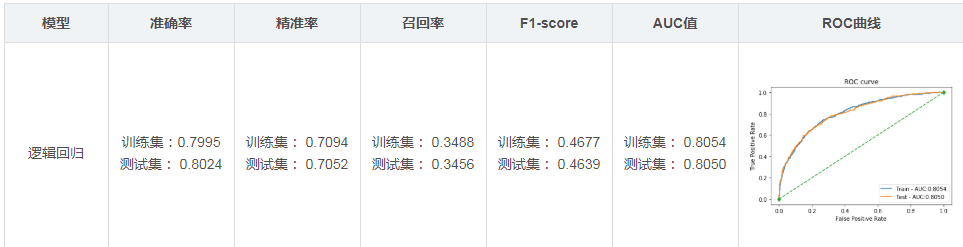

In [48]:
['模型', '数据集', '准确率', '精准率', '召回率', 'F1_score', 'AUC值']

['模型', '数据集', '准确率', '精准率', '召回率', 'F1_score', 'AUC值']

In [49]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def get_P_R_value(y_true, y_pred):
    """
    :param y_true: 
    :param y_pred: 
    :returns: 
        # ['准确率_score', '精准率_precision', '召回率_recall', 'f1_score'],
        # [score, P, R, F1]
    :raises keyError: raises an exception
    """
    obj = confusion_matrix(y_true, y_pred)
    print('confusion_matrix\n', obj)
    score = (obj[0,0] + obj[1,1])/obj.sum()
    print(f'score, {score:0.4f}')
    P = precision_score(y_true, y_pred)
    R = recall_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    print(f'precision {P:0.4f}, recall {R:0.4f}, f1_score {F1:0.4f}, auc {auc:0.4f}')
    data = dict(zip(
        ['score', 'precision', 'recall', 'f1_score', 'auc'],
        [f'{score:0.4f}',f'{P:0.4f}', f'{R:0.4f}', f'{F1:0.4f}', f'{auc:0.4f}']
    ))
    return data

## 计算评分

In [50]:
data_list = []

### xgb

训练集集

In [51]:
data = {}
data['clf_model'] = 'clf_xgb'
data['data_set'] = 'train'

In [52]:
dtrain = xgb.DMatrix(x_train)
y_train_pred = gbm.predict(dtrain)

In [53]:
y_train_pred 

array([0.04176517, 0.00085185, 0.01140942, ..., 0.00015964, 0.00126992,
       0.00325592], dtype=float32)

In [54]:
data.update(get_P_R_value(y_train, y_train_pred > 0.5))

confusion_matrix
 [[2479    0]
 [   0  847]]
score, 1.0000
precision 1.0000, recall 1.0000, f1_score 1.0000, auc 1.0000


In [55]:
data_list.append(data)

测试集

In [56]:
data = {}
data['clf_model'] = 'clf_xgb'
data['data_set'] = 'test'

In [57]:
dtest = xgb.DMatrix(x_test)
ans = gbm.predict(dtest)

In [58]:
data.update(get_P_R_value(y_test, ans>0.5))

confusion_matrix
 [[994  86]
 [205 141]]
score, 0.7959
precision 0.6211, recall 0.4075, f1_score 0.4921, auc 0.6639


In [59]:
data_list.append(data)

In [60]:
data

{'clf_model': 'clf_xgb',
 'data_set': 'test',
 'score': '0.7959',
 'precision': '0.6211',
 'recall': '0.4075',
 'f1_score': '0.4921',
 'auc': '0.6639'}

### 其他

In [61]:
[i for i in dir() if 'clf' in i]

['clf_dt', 'clf_lr', 'clf_rf', 'clf_svm']

In [62]:
def get_score(clf_model, data_set):
    # clf_model
    # ['clf_dt', 'clf_lr', 'clf_rf', 'clf_svm']
    
    # data_set
    # train, test
    data = {}
    data['clf_model'] = clf_model
    data['data_set'] = data_set
    print(f'{clf_model} >>> {data_set}')
    clf = eval(clf_model)
    y_true = eval('y_%s' % data_set)
    x = eval('x_%s' % data_set)
    data.update(get_P_R_value(y_true, clf.predict(x)))
    return data

In [63]:
for clf_model in ['clf_dt', 'clf_lr', 'clf_rf', 'clf_svm']:
    for data_set in ['train', 'test']:
        data = get_score(clf_model, data_set)
        data_list.append(data)
    print('-' * 30)

clf_dt >>> train
confusion_matrix
 [[2479    0]
 [   0  847]]
score, 1.0000
precision 1.0000, recall 1.0000, f1_score 1.0000, auc 1.0000
clf_dt >>> test
confusion_matrix
 [[846 234]
 [199 147]]
score, 0.6964
precision 0.3858, recall 0.4249, f1_score 0.4044, auc 0.6041
------------------------------
clf_lr >>> train
confusion_matrix
 [[2361  118]
 [ 542  305]]
score, 0.8016
precision 0.7210, recall 0.3601, f1_score 0.4803, auc 0.6562
clf_lr >>> test
confusion_matrix
 [[1023   57]
 [ 224  122]]
score, 0.8029
precision 0.6816, recall 0.3526, f1_score 0.4648, auc 0.6499
------------------------------
clf_rf >>> train
confusion_matrix
 [[2477    2]
 [  55  792]]
score, 0.9829
precision 0.9975, recall 0.9351, f1_score 0.9653, auc 0.9671
clf_rf >>> test
confusion_matrix
 [[1018   62]
 [ 245  101]]
score, 0.7847
precision 0.6196, recall 0.2919, f1_score 0.3969, auc 0.6173
------------------------------
clf_svm >>> train
confusion_matrix
 [[2443   36]
 [ 555  292]]
score, 0.8223
precision 0.890

In [64]:
data.keys()

dict_keys(['clf_model', 'data_set', 'score', 'precision', 'recall', 'f1_score', 'auc'])

In [65]:
df = pd.DataFrame(data_list, columns=['clf_model', 'data_set', 'score', 'precision', 'recall', 'f1_score', 'auc'])

In [66]:
df

,clf_model,data_set,score,precision,recall,f1_score,auc
0,clf_xgb,train,1.0000,1.0000,1.0000,1.0000,1.0000
1,clf_xgb,test,0.7959,0.6211,0.4075,0.4921,0.6639
2,clf_dt,train,1.0000,1.0000,1.0000,1.0000,1.0000
3,clf_dt,test,0.6964,0.3858,0.4249,0.4044,0.6041
4,clf_lr,train,0.8016,0.7210,0.3601,0.4803,0.6562
5,clf_lr,test,0.8029,0.6816,0.3526,0.4648,0.6499
6,clf_rf,train,0.9829,0.9975,0.9351,0.9653,0.9671
7,clf_rf,test,0.7847,0.6196,0.2919,0.3969,0.6173
8,clf_svm,train,0.8223,0.8902,0.3447,0.4970,0.6651
9,clf_svm,test,0.7966,0.7154,0.2688,0.3908,0.6173


In [67]:
df.clf_model = df.clf_model.replace(['clf_lr','clf_svm', 'clf_dt',  'clf_rf', 'clf_xgb'],
                    ['逻辑回归', 'SVM', '决策树', '随机森林', 'XGBoost']
)

In [68]:
df.data_set = df.data_set.replace(['train','test', ],
                    ['训练集', '测试集']
)

In [69]:
df.columns

Index(['clf_model', 'data_set', 'score', 'precision', 'recall', 'f1_score',
       'auc'],
      dtype='object')

In [70]:
df.columns = ['模型', '数据集', '准确率', '精准率', '召回率', 'F1_score', 'AUC值']

In [71]:
df

,模型,数据集,准确率,精准率,召回率,F1_score,AUC值
0,XGBoost,训练集,1.0000,1.0000,1.0000,1.0000,1.0000
1,XGBoost,测试集,0.7959,0.6211,0.4075,0.4921,0.6639
2,决策树,训练集,1.0000,1.0000,1.0000,1.0000,1.0000
3,决策树,测试集,0.6964,0.3858,0.4249,0.4044,0.6041
4,逻辑回归,训练集,0.8016,0.7210,0.3601,0.4803,0.6562
5,逻辑回归,测试集,0.8029,0.6816,0.3526,0.4648,0.6499
6,随机森林,训练集,0.9829,0.9975,0.9351,0.9653,0.9671
7,随机森林,测试集,0.7847,0.6196,0.2919,0.3969,0.6173
8,SVM,训练集,0.8223,0.8902,0.3447,0.4970,0.6651
9,SVM,测试集,0.7966,0.7154,0.2688,0.3908,0.6173


## ROC曲线

In [72]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

In [73]:
clf_model = 'clf_lr'
data_set = 'train'
def get_roc_element(clf_model,data_set):

    clf = eval(clf_model)
    y_true = eval('y_%s' % data_set)
    x = eval('x_%s' % data_set)
    
    if clf_model in ['clf_dt', 'clf_rf']:
        y_probas = cross_val_predict(clf, x, y_true, cv=3, method='predict_proba')
        y_scores = y_probas[:, 1]
    else:
        y_scores = cross_val_predict(clf, x, y_true, cv=3, method='decision_function')
        
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_data = dict(zip(
        ['clf_model', 'data_set', 'fpr', 'tpr', 'thresholds'],
        [clf_model, data_set, fpr, tpr, thresholds]
    ))
    return roc_data

In [74]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Postivie Rate')
    plt.ylabel('True Positive Rate')

### LR

In [75]:
clf_model = 'clf_lr'
roc_data_train = get_roc_element(clf_model,'train')
roc_data_test = get_roc_element(clf_model,'test')

/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

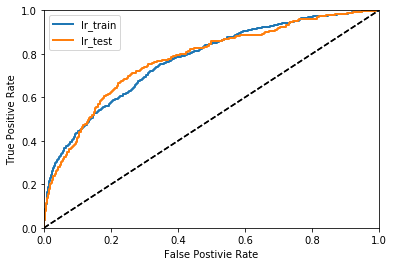

In [76]:
plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='lr_train')
plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='lr_test')
plt.legend()
plt.show()

### SVM

In [77]:
clf_model = 'clf_svm'
roc_data_train = get_roc_element(clf_model,'train')
roc_data_test = get_roc_element(clf_model,'test')

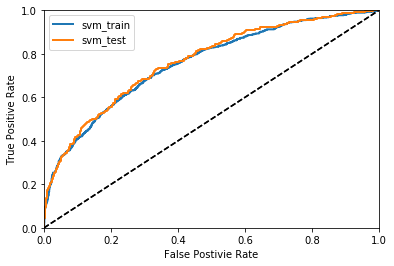

In [78]:
plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='svm_train')
plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='svm_test')
plt.legend()
plt.show()

### DecisionTree

In [79]:
clf_model = 'clf_dt'
roc_data_train = get_roc_element(clf_model,'train')
roc_data_test = get_roc_element(clf_model,'test')

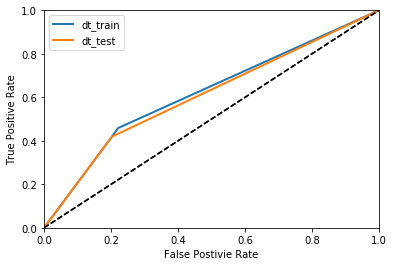

In [80]:
plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='dt_train')
plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='dt_test')
plt.legend()
plt.show()

### RondomForest

In [81]:
clf_model = 'clf_rf'
roc_data_train = get_roc_element(clf_model,'train')
roc_data_test = get_roc_element(clf_model,'test')

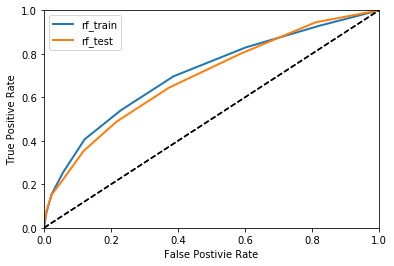

In [82]:
plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='rf_train')
plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='rf_test')
plt.legend()
plt.show()

### XGboost

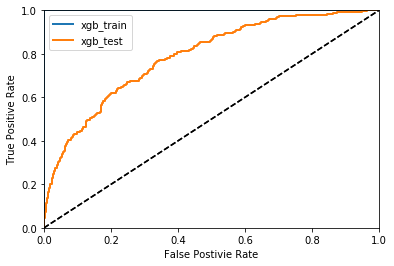

In [83]:
# plt.figure(figsize=(12, 8))
y_train_pred = gbm.predict(xgb.DMatrix(x_train), ntree_limit=gbm.best_iteration+1)
fpr_train, tpr_train, _ = roc_curve(y_train.values, y_train_pred)
plot_roc_curve(fpr_train, tpr_train, label='xgb_train')


y_test_pred = gbm.predict(xgb.DMatrix(x_test), ntree_limit=gbm.best_iteration+1)
fpr_test, tpr_test, _ = roc_curve(y_test.values, y_test_pred)
plot_roc_curve(fpr_test, tpr_test, label='xgb_test')

plt.legend()
plt.show()

# 结果汇总

/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

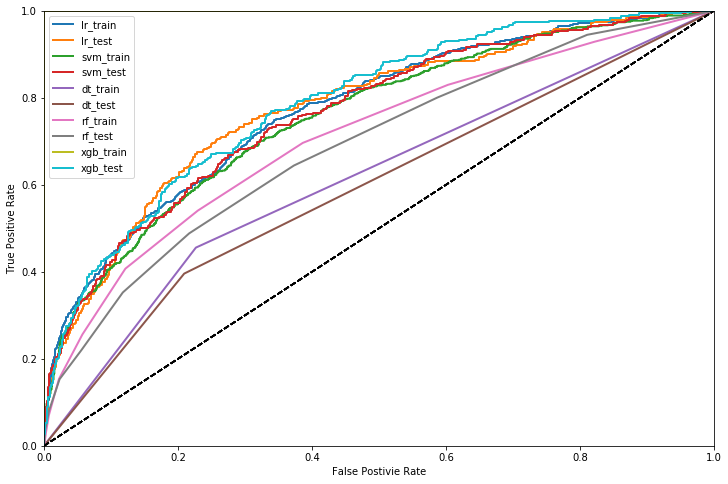

In [84]:
plt.figure(figsize=(12, 8))

### LR
clf_model = 'clf_lr'
roc_data_train = get_roc_element(clf_model,'train')
roc_data_test = get_roc_element(clf_model,'test')

plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='lr_train')
plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='lr_test')

### SVM
clf_model = 'clf_svm'
roc_data_train = get_roc_element(clf_model,'train')
roc_data_test = get_roc_element(clf_model,'test')

plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='svm_train')
plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='svm_test')

### DecisionTree

clf_model = 'clf_dt'
roc_data_train = get_roc_element(clf_model,'train')
roc_data_test = get_roc_element(clf_model,'test')

plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='dt_train')
plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='dt_test')


### RondomForest

clf_model = 'clf_rf'
roc_data_train = get_roc_element(clf_model,'train')
roc_data_test = get_roc_element(clf_model,'test')

plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='rf_train')
plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='rf_test')


### XGboost

y_train_pred = gbm.predict(xgb.DMatrix(x_train), ntree_limit=gbm.best_iteration+1)
fpr_train, tpr_train, _ = roc_curve(y_train.values, y_train_pred)
plot_roc_curve(fpr_train, tpr_train, label='xgb_train')

y_test_pred = gbm.predict(xgb.DMatrix(x_test), ntree_limit=gbm.best_iteration+1)
fpr_test, tpr_test, _ = roc_curve(y_test.values, y_test_pred)
plot_roc_curve(fpr_test, tpr_test, label='xgb_test')

plt.legend()
plt.show()

In [85]:
df

,模型,数据集,准确率,精准率,召回率,F1_score,AUC值
0,XGBoost,训练集,1.0000,1.0000,1.0000,1.0000,1.0000
1,XGBoost,测试集,0.7959,0.6211,0.4075,0.4921,0.6639
2,决策树,训练集,1.0000,1.0000,1.0000,1.0000,1.0000
3,决策树,测试集,0.6964,0.3858,0.4249,0.4044,0.6041
4,逻辑回归,训练集,0.8016,0.7210,0.3601,0.4803,0.6562
5,逻辑回归,测试集,0.8029,0.6816,0.3526,0.4648,0.6499
6,随机森林,训练集,0.9829,0.9975,0.9351,0.9653,0.9671
7,随机森林,测试集,0.7847,0.6196,0.2919,0.3969,0.6173
8,SVM,训练集,0.8223,0.8902,0.3447,0.4970,0.6651
9,SVM,测试集,0.7966,0.7154,0.2688,0.3908,0.6173


1. XGBoost、决策树和随机森林过拟合
2. 未调参之前，最优模型为LR， XGBoost

## Q

1. XGBoost、决策树和随机森林出现过拟合，需要寻找过拟合处理方法
2. 调参方法

# 参考资料

## plot-roc

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

In [87]:
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
print(auc(fpr, tpr))
fpr, tpr, thresholds

0.75


(array([0. , 0. , 0.5, 0.5, 1. ]),
 array([0. , 0.5, 0.5, 1. , 1. ]),
 array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ]))

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [89]:
y_test[:, 0]

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0])

In [90]:
y_score[:, 0]

array([-0.76301132, -0.20224493,  0.11801481, -0.90780855, -0.01116192,
       -0.6048727 ,  0.02283491, -0.61076876, -0.37572754, -0.47017411,
       -0.42224234, -0.3355867 , -0.22723929, -0.07856729, -0.53383361,
        0.12163662, -0.71356947, -0.55111511,  0.37991331, -0.11107635,
       -0.70713712, -0.02392675, -0.25045747,  0.12675547, -0.68210402,
       -0.08001795, -0.03259341, -0.04953425, -0.12974835, -0.19299299,
       -0.3619768 , -0.22818639, -0.06196433, -0.52455061, -0.40026409,
       -0.35056585, -0.05770139, -1.11907501,  0.19599366, -0.04299172,
       -0.48108269,  0.1741885 , -0.41416456, -0.01053513,  0.01645355,
       -0.11932181, -0.70817199, -0.77303401, -0.61489613, -0.96334774,
       -0.31037723, -0.31952657, -0.35306417,  0.12127427, -0.6643231 ,
       -0.55149778, -0.55695146, -0.41111447, -0.49463336,  0.06910059,
       -0.23036784,  0.30342285,  0.17642852, -0.1906155 , -0.42910413,
       -0.67759563, -0.32958811, -0.97119543,  0.02088168, -0.08

In [91]:
fpr

{0: array([0.        , 0.        , 0.        , 0.01851852, 0.01851852,
        0.03703704, 0.03703704, 0.05555556, 0.05555556, 0.07407407,
        0.07407407, 0.09259259, 0.09259259, 0.12962963, 0.12962963,
        0.14814815, 0.14814815, 0.2037037 , 0.2037037 , 0.27777778,
        0.27777778, 1.        ]),
 1: array([0.        , 0.        , 0.        , 0.02222222, 0.02222222,
        0.11111111, 0.11111111, 0.17777778, 0.17777778, 0.2       ,
        0.2       , 0.24444444, 0.24444444, 0.26666667, 0.26666667,
        0.37777778, 0.37777778, 0.42222222, 0.42222222, 0.48888889,
        0.48888889, 0.55555556, 0.55555556, 0.62222222, 0.62222222,
        0.64444444, 0.64444444, 0.66666667, 0.66666667, 0.73333333,
        0.73333333, 0.75555556, 0.75555556, 0.88888889, 0.88888889,
        1.        ]),
 2: array([0.        , 0.        , 0.        , 0.01960784, 0.01960784,
        0.07843137, 0.07843137, 0.09803922, 0.09803922, 0.11764706,
        0.11764706, 0.1372549 , 0.1372549 , 0.15686

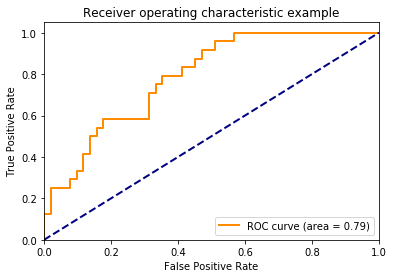

In [92]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## xgboost

https://www.kaggle.com/beletecheneke/xgboost-with-roc-curve-notebook-auprc-93

In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error
from operator import itemgetter
import xgboost as xgb
import random
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from numpy import genfromtxt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc,recall_score,precision_score
import datetime as dt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [94]:
def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    for i, feat in enumerate(features):
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
    outfile.close()

def get_importance(gbm, features):
    create_feature_map(features)
    importance = gbm.get_fscore(fmap='xgb.fmap')
    importance = sorted(importance.items(), key=itemgetter(1), reverse=True)
    return importance

def get_features(train, test):
    trainval = list(train.columns.values)
    output = trainval
    return sorted(output)

def run_single(train, test, features, target, random_state=0):
    eta = 0.1
    max_depth= 6 
    subsample = 1
    colsample_bytree = 1
    min_chil_weight=1
    start_time = time.time()

    print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))
    params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "eta": eta,
        "tree_method": 'exact',
        "max_depth": max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent": 1,
        "min_chil_weight":min_chil_weight,
        "seed": random_state,
        #"num_class" : 22,
    }
    num_boost_round = 500
    early_stopping_rounds = 20
    test_size = 0.1

   
    
    X_train, X_valid = train_test_split(train, test_size=test_size, random_state=random_state)
    print('Length train:', len(X_train.index))
    print('Length valid:', len(X_valid.index))
    y_train = X_train[target]
    y_valid = X_valid[target]
    dtrain = xgb.DMatrix(X_train[features], y_train, missing=-99)
    dvalid = xgb.DMatrix(X_valid[features], y_valid, missing =-99)

    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

    print("Validating...")
    check = gbm.predict(xgb.DMatrix(X_valid[features]), ntree_limit=gbm.best_iteration+1)
    
    #area under the precision-recall curve
    score = average_precision_score(X_valid[target].values, check)
    print('area under the precision-recall curve: {:.6f}'.format(score))

    
    check2=check.round()
    score = precision_score(X_valid[target].values, check2)
    print('precision score: {:.6f}'.format(score))

    score = recall_score(X_valid[target].values, check2)
    print('recall score: {:.6f}'.format(score))
    
    imp = get_importance(gbm, features)
    print('Importance array: ', imp)

    print("Predict test set... ")
    test_prediction = gbm.predict(xgb.DMatrix(test[features],missing = -99), ntree_limit=gbm.best_iteration+1)
    score = average_precision_score(test[target].values, test_prediction)

    print('area under the precision-recall curve test set: {:.6f}'.format(score))
    
    ############################################ ROC Curve
    
    # Compute micro-average ROC curve and ROC area
    fpr, tpr, _ = roc_curve(X_valid[target].values, check)
    roc_auc = auc(fpr, tpr)
    #xgb.plot_importance(gbm)
    #plt.show()
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()
    ##################################################


    print('Training time: {} minutes'.format(round((time.time() - start_time)/60, 2)))
    return test_prediction, imp, gbm.best_iteration+1

In [95]:
# Any results you write to the current directory are saved as output.
start_time = dt.datetime.now()
print("Start time: ",start_time)

Start time:  2019-08-12 16:57:43.072600


In [96]:
train = pd.read_csv('train_set.csv', usecols = cols_left )
test = pd.read_csv('test_set.csv', usecols = cols_left)

In [97]:
features = list(train.columns.values)

In [98]:
features.remove('status')

In [99]:
# features

In [100]:
(train, test, features, target, random_state) =  (train, test, features, 'status', 2018) 
eta = 0.1
max_depth= 6 
subsample = 1
colsample_bytree = 1
min_chil_weight=1
start_time = time.time()

print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))
params = {
    "objective": "binary:logistic",
    "booster" : "gbtree",
    "eval_metric": "auc",
    "eta": eta,
    "tree_method": 'exact',
    "max_depth": max_depth,
    "subsample": subsample,
    "colsample_bytree": colsample_bytree,
    "silent": 1,
    "min_chil_weight":min_chil_weight,
    "seed": random_state,
    #"num_class" : 22,
}
num_boost_round = 500
early_stopping_rounds = 20
test_size = 0.1

XGBoost params. ETA: 0.1, MAX_DEPTH: 6, SUBSAMPLE: 1, COLSAMPLE_BY_TREE: 1


In [101]:
X_train, X_valid = train_test_split(train, test_size=test_size, random_state=random_state)
print('Length train:', len(X_train.index))
print('Length valid:', len(X_valid.index))
y_train = X_train[target]
y_valid = X_valid[target]
dtrain = xgb.DMatrix(X_train[features], y_train, missing=-99)
dvalid = xgb.DMatrix(X_valid[features], y_valid, missing =-99)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

print("Validating...")
check = gbm.predict(xgb.DMatrix(X_valid[features]), ntree_limit=gbm.best_iteration+1)

Length train: 2993
Length valid: 333
[0]	train-auc:0.825755	eval-auc:0.771528
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 20 rounds.
[1]	train-auc:0.855978	eval-auc:0.77413
[2]	train-auc:0.882103	eval-auc:0.781428
[3]	train-auc:0.884534	eval-auc:0.77954
[4]	train-auc:0.89549	eval-auc:0.772196
[5]	train-auc:0.902978	eval-auc:0.768719
[6]	train-auc:0.913105	eval-auc:0.767568
[7]	train-auc:0.918331	eval-auc:0.762364
[8]	train-auc:0.923883	eval-auc:0.761535
[9]	train-auc:0.928011	eval-auc:0.760223
[10]	train-auc:0.931323	eval-auc:0.758933
[11]	train-auc:0.936123	eval-auc:0.761604
[12]	train-auc:0.941513	eval-auc:0.765334
[13]	train-auc:0.943105	eval-auc:0.767913
[14]	train-auc:0.945812	eval-auc:0.770768
[15]	train-auc:0.948148	eval-auc:0.772288
[16]	train-auc:0.949832	eval-auc:0.773853
[17]	train-auc:0.953354	eval-auc:0.776156
[18]	train-auc:0.956046	eval-auc:0.778781


/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[19]	train-auc:0.959114	eval-auc:0.778228
[20]	train-auc:0.9616	eval-auc:0.778596
[21]	train-auc:0.963937	eval-auc:0.778596
[22]	train-auc:0.966222	eval-auc:0.777583
Stopping. Best iteration:
[2]	train-auc:0.882103	eval-auc:0.781428

Validating...


In [102]:
check

array([0.39839312, 0.37798333, 0.43616325, 0.4364492 , 0.3867148 ,
       0.41011024, 0.45774654, 0.39170176, 0.512856  , 0.37798333,
       0.38537538, 0.39170176, 0.4143904 , 0.38537538, 0.47110856,
       0.38537538, 0.42382804, 0.40364245, 0.5578622 , 0.40675485,
       0.45986333, 0.4092024 , 0.40075696, 0.38286453, 0.48294657,
       0.44811797, 0.39170176, 0.5382062 , 0.42854768, 0.46017408,
       0.5778928 , 0.443122  , 0.40029457, 0.5531804 , 0.5531804 ,
       0.43448284, 0.3883884 , 0.39170176, 0.4319175 , 0.4171982 ,
       0.46017408, 0.38867941, 0.38537538, 0.4541124 , 0.3921607 ,
       0.49451464, 0.4225249 , 0.37798333, 0.3921607 , 0.3883884 ,
       0.52125525, 0.48326007, 0.443122  , 0.42543697, 0.52632785,
       0.38537538, 0.38537538, 0.40410614, 0.40396857, 0.4536541 ,
       0.38537538, 0.44684407, 0.41817263, 0.4143904 , 0.38537538,
       0.56530905, 0.4271949 , 0.37798333, 0.47101492, 0.3883884 ,
       0.37798333, 0.4718553 , 0.38537538, 0.40372512, 0.51784

In [103]:
X_valid.shape

(333, 55)

In [104]:
#area under the precision-recall curve
score = average_precision_score(X_valid[target].values, check)
print('area under the precision-recall curve: {:.6f}'.format(score))


check2=check.round()
score = precision_score(X_valid[target].values, check2)
print('precision score: {:.6f}'.format(score))

score = recall_score(X_valid[target].values, check2)
print('recall score: {:.6f}'.format(score))

imp = get_importance(gbm, features)
print('Importance array: ', imp)

area under the precision-recall curve: 0.549543
precision score: 0.562500
recall score: 0.303371
Importance array:  [('history_fail_fee', 67), ('trans_fail_top_count_enum_last_1_month', 60), ('loans_score', 47), ('trans_day_last_12_month', 47), ('latest_one_month_suc', 35), ('apply_score', 35), ('loans_long_time', 35), ('latest_query_time_diff_day', 33), ('repayment_capability', 32), ('avg_price_last_12_month', 31), ('abs', 27), ('loans_avg_limit', 27), ('trans_amount_3_month', 26), ('history_suc_fee', 26), ('trans_amount_increase_rate_lately', 26), ('trans_days_interval', 25), ('loans_credit_limit', 24), ('consfin_max_limit', 24), ('trans_activity_month', 24), ('trans_activity_day', 24), ('apply_credibility', 23), ('historical_trans_day', 23), ('first_transaction_time_diff_day', 22), ('consfin_avg_limit', 22), ('pawns_auctions_trusts_consume_last_1_month', 21), ('pawns_auctions_trusts_consume_last_6_month', 21), ('take_amount_in_later_12_month_highest', 21), ('historical_trans_amount'

In [105]:
print("Predict test set... ")
test_prediction = gbm.predict(xgb.DMatrix(test[features],missing = -99), ntree_limit=gbm.best_iteration+1)
score = average_precision_score(test[target].values, test_prediction)

Predict test set... 


In [106]:
test_prediction

array([0.5287591 , 0.4171982 , 0.390319  , ..., 0.39389798, 0.5857251 ,
       0.39170176], dtype=float32)

In [107]:
score

0.5279975100457264

In [108]:
print('area under the precision-recall curve test set: {:.6f}'.format(score))

area under the precision-recall curve test set: 0.527998


In [109]:
check

array([0.39839312, 0.37798333, 0.43616325, 0.4364492 , 0.3867148 ,
       0.41011024, 0.45774654, 0.39170176, 0.512856  , 0.37798333,
       0.38537538, 0.39170176, 0.4143904 , 0.38537538, 0.47110856,
       0.38537538, 0.42382804, 0.40364245, 0.5578622 , 0.40675485,
       0.45986333, 0.4092024 , 0.40075696, 0.38286453, 0.48294657,
       0.44811797, 0.39170176, 0.5382062 , 0.42854768, 0.46017408,
       0.5778928 , 0.443122  , 0.40029457, 0.5531804 , 0.5531804 ,
       0.43448284, 0.3883884 , 0.39170176, 0.4319175 , 0.4171982 ,
       0.46017408, 0.38867941, 0.38537538, 0.4541124 , 0.3921607 ,
       0.49451464, 0.4225249 , 0.37798333, 0.3921607 , 0.3883884 ,
       0.52125525, 0.48326007, 0.443122  , 0.42543697, 0.52632785,
       0.38537538, 0.38537538, 0.40410614, 0.40396857, 0.4536541 ,
       0.38537538, 0.44684407, 0.41817263, 0.4143904 , 0.38537538,
       0.56530905, 0.4271949 , 0.37798333, 0.47101492, 0.3883884 ,
       0.37798333, 0.4718553 , 0.38537538, 0.40372512, 0.51784

In [110]:
X_valid[target].values

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,

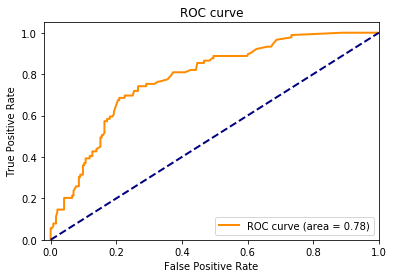

Training time: 0.08 minutes


In [111]:
############################################ ROC Curve

# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(X_valid[target].values, check)
roc_auc = auc(fpr, tpr)
#xgb.plot_importance(gbm)
#plt.show()
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
##################################################


print('Training time: {} minutes'.format(round((time.time() - start_time)/60, 2)))

In [112]:
x_train

,trans_activity_month,trans_activity_day,rank_trad_1_month,top_trans_count_last_1_month,avg_price_top_last_12_valid_month,first_transaction_time_diff_day,latest_query_time_diff_day,loans_latest_time_diff_day,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,transd_mcc,trans_days_interval_filter,trans_days_interval,repayment_capability,number_of_trans_from_2011,historical_trans_amount,historical_trans_day,trans_amount_3_month,abs,avg_price_last_12_month,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_sum_count,loans_score,loans_count,loans_settle_count,loans_overdue_count,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,0.134047,-1.353319,1.992037,1.839581,-0.107077,-1.120560,0.218164,0.656727,-0.403875,-0.021182,-1.004892,2.613071,4.484165,-0.145876,-1.290611,-0.586927,-1.358984,-0.311294,-0.297651,0.082433,-1.348988,0.533263,-1.300570,-0.423735,0.696823,-0.122621,-0.258803,-0.414413,-0.313775,-0.192204,-0.442215,-1.120560,0.234496,-0.894778,0.489077,-0.438137,-0.810924,-0.824746,-0.708466,-0.075726,-1.017990,-0.903410,-0.294631,-0.598487,-0.320305,-1.002166,0.453138,-0.401657,1.055294,-1.247028,-1.112937,-1.409680,0.219396,0.668269
1,0.990363,0.416102,-0.659154,-0.721391,0.289513,-1.482824,0.180649,0.062761,-0.113359,-0.021508,-0.781014,-0.574439,-0.947529,-0.057434,-1.684796,-0.393775,-0.978945,-0.100813,0.032556,-0.276177,-0.208631,-1.081718,0.373749,-0.874773,0.174245,-0.335037,-0.459263,0.310349,-0.010055,-0.192204,-0.504100,-1.482824,-0.382186,-0.595405,0.739142,0.467321,-0.442417,0.959778,1.040451,-0.075726,1.235352,0.641945,0.081820,1.489156,-0.320305,0.430439,0.015780,0.438275,0.320450,-0.195755,0.123866,-0.067564,0.180959,0.060388
2,0.134047,0.697335,-0.848524,-0.863667,0.091218,2.940132,0.195655,0.301081,-0.355456,-0.021194,1.010008,-0.126607,-0.398256,-0.086415,4.622159,0.197260,1.821340,0.202273,-0.303766,-0.138250,0.551607,-0.389583,0.559784,-0.423735,0.174245,1.151875,0.943961,-0.412100,-0.054528,-0.031308,1.135691,2.940132,-0.382186,-1.014528,0.989206,0.648413,-0.978427,0.918278,0.804111,2.196239,0.014792,0.709135,1.043861,-0.076576,-0.320305,0.518150,0.015780,0.228292,-0.160440,0.118262,-0.288401,0.111503,0.196334,0.304291
3,-0.621527,1.101607,-1.037895,-0.863667,0.091218,0.348830,0.266933,0.458738,-0.476505,-0.021387,0.114497,-0.548095,-0.886499,-0.122558,0.286128,0.386708,0.901247,0.207033,-0.113183,-0.207214,-0.018572,-1.004814,0.001678,-1.025119,0.174245,-0.547453,-0.058342,0.945703,-0.093578,-0.021598,0.849172,0.348830,-0.382186,-0.695196,0.489077,-0.890866,-0.643421,-0.451241,-0.283054,-0.400292,-0.736322,0.138025,-0.587426,-0.598487,-0.320305,0.342729,-0.713151,-0.751629,-0.814235,-0.100184,-0.205948,0.144349,0.269363,0.465642
4,0.385904,-1.353319,1.992037,1.839581,0.487808,-0.312857,0.259430,0.389076,-0.355456,-0.017263,-0.557137,1.401290,0.883379,-0.137048,-0.206603,-0.596318,-1.058954,-0.322199,-0.307163,-0.924434,-1.348988,0.148744,-1.300570,0.102476,3.309715,0.727043,0.543040,-0.414413,-0.313775,-0.192204,-0.370072,-0.312857,2.925474,-0.834904,0.739142,-0.800321,-1.330183,-1.032248,-1.228414,0.897974,-0.736322,-1.272952,4.724713,-0.598487,2.832350,-0.534377,-1.296296,-1.521568,-1.106012,-0.960317,-0.948030,-1.150793,0.261676,0.394348
5,-0.319298,-0.802572,1.992037,1.839581,1.082692,-0.479203,0.199406,0.264416,-0.161778,-0.021146,-0.333259,0.084138,1.737803,-

XGBoost params. ETA: 0.1, MAX_DEPTH: 6, SUBSAMPLE: 1, COLSAMPLE_BY_TREE: 1
Length train: 2993
Length valid: 333
[0]	train-auc:0.825755	eval-auc:0.771528
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 20 rounds.
[1]	train-auc:0.855978	eval-auc:0.77413
[2]	train-auc:0.882103	eval-auc:0.781428
[3]	train-auc:0.884534	eval-auc:0.77954
[4]	train-auc:0.89549	eval-auc:0.772196
[5]	train-auc:0.902978	eval-auc:0.768719
[6]	train-auc:0.913105	eval-auc:0.767568
[7]	train-auc:0.918331	eval-auc:0.762364
[8]	train-auc:0.923883	eval-auc:0.761535
[9]	train-auc:0.928011	eval-auc:0.760223
[10]	train-auc:0.931323	eval-auc:0.758933
[11]	train-auc:0.936123	eval-auc:0.761604
[12]	train-auc:0.941513	eval-auc:0.765334
[13]	train-auc:0.943105	eval-auc:0.767913
[14]	train-auc:0.945812	eval-auc:0.770768
[15]	train-auc:0.948148	eval-auc:0.772288
[16]	train-auc:0.949832	eval-auc:0.773853
[17]	train-auc:0.953354	eval-auc:0.776156
[18]

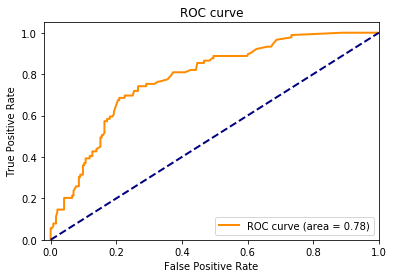

Training time: 0.01 minutes


TypeError: unsupported operand type(s) for -: 'datetime.datetime' and 'float'

In [113]:
preds, imp, num_boost_rounds = run_single(train, test, features, 'status', 2018) 
print(dt.datetime.now()-start_time)

## precision_recall_curve

P-R 

precision_recall_curve

In [118]:
from sklearn.metrics import roc_curve, auc

In [125]:
x_train, y_train = train_set.iloc[:, :-1], train_set['status']
x_test, y_test = test_set.iloc[:, :-1], test_set['status']

x_train = pd.DataFrame(x_train_scale, columns=x_train.columns)
x_test = pd.DataFrame(x_test_scale, columns=x_test.columns)

In [126]:
x_train.shape

(3326, 54)

In [127]:
y_train.shape

(3326,)

In [128]:
y_probas_forest = cross_val_predict(clf_rf, x_train, y_train, cv = 3, method='predict_proba')
y_scores_forest = y_probas_forest[:,1]

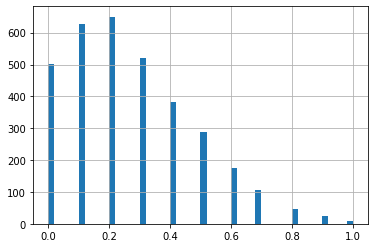

In [129]:
pd.Series(y_scores_forest).hist(bins=50)

In [130]:
from sklearn.metrics import precision_recall_curve
precisions_forest, recalls_forest, thresholds_forest =  precision_recall_curve(y_train, y_scores_forest)

In [131]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

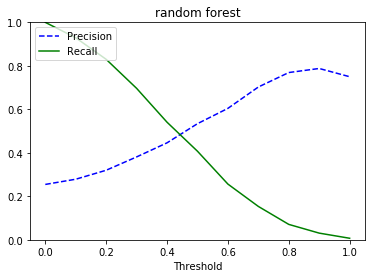

In [132]:
plot_precision_recall_vs_threshold(precisions_forest, recalls_forest, thresholds_forest)
plt.title('random forest')
plt.show()

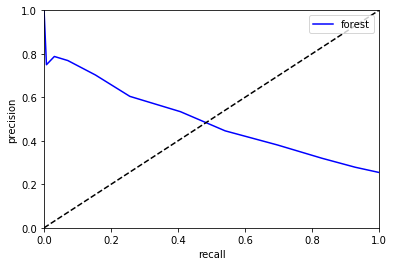

In [133]:
plt.plot(recalls_forest, precisions_forest, 'b-', label = 'forest')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('recall')
plt.ylabel('precision')
plt.axis([0,1,0,1])
plt.legend(loc='upper right')
plt.show()